# Desafio 4 — Limpeza e Análise de Dados de Clientes Bancários

Neste notebook, conduzimos um processo completo de **extração, limpeza, análise exploratória** e **geração de insights estatísticos** com base em uma base de dados fornecida pelo gerente do banco.  
Nosso objetivo é identificar padrões relevantes nos perfis dos clientes, com foco na saída da instituição financeira, a fim de apoiar decisões estratégicas.

> 📁 Fonte de dados: Planilha com registros de clientes dos estados do Nordeste.  
> 📊 Ferramentas utilizadas: Python, Pandas, Seaborn, Matplotlib, NumPy.


## Imports


In [1]:
# Importações e configuração de caminhos
import sys
import os
import pandas as pd

sys.path.append(os.path.abspath('../src'))

from limpeza import (
    carregar_dados,
    renomear_colunas,
    corrigir_genero,
    corrigir_estado,
    remover_duplicatas,
    tratar_nulos,
    tratar_outliers_iqr
)

from visualizacoes import (
    plot_distribuicao_categorica,
    boxplot_com_saida,
    violinplot_idade_genero,
    histograma_coluna,
    heatmap_correlacoes
)

from estatisticas import (
    media_mediana_por_idade,
    media_mediana_por_saida,
    perfil_clientes_que_saem
)

caminho_dados = '../data/clientes_banco.csv'

## 1. Carregamento Inicial

Nesta etapa, realizamos a importação dos dados e uma visualização inicial para entender seu formato bruto.

In [2]:
df = carregar_dados(caminho_dados)
print('Shape original:', df.shape)
df.head()

Shape original: (999, 12)


,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTOS,POSSUI CARTAO,ATIVO,SALARIO ANUAL,SAIU
0,1,619,PI,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,PI,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,PI,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0


## 2. Limpeza e Padronização

Aqui aplicamos técnicas para tornar os dados consistentes e preparados para análise:
- Renomeamos as colunas para padrão `snake_case` (estilo ML);
- Padronizamos o gênero e o estado;
- Tratamos nulos e outliers;
- Removemos duplicatas.

In [3]:
df = renomear_colunas(df)
df = corrigir_genero(df)
df = corrigir_estado(df)
df = remover_duplicatas(df)
df = tratar_nulos(df)

colunas_numericas = ['pontos', 'idade', 'bens', 'saldo_na_conta', 'produtos', 'salario_anual']
df = tratar_outliers_iqr(df, colunas_numericas)

print('Shape após tratamento:', df.shape)
df.sample(5)

Shape após tratamento: (998, 12)


,id,pontos,estado,genero,idade,bens,saldo_na_conta,produtos,possui_cartao,ativo,salario_anual,saiu
652,654,668,PI,masculino,42,3,15046107,1.0,1,0,10813923.0,0
569,571,761,PI,masculino,31,7,0,3.0,1,1,16669818.0,0
433,435,545,MA,feminino,37,8,11475408,1.0,1,0,13605044.0,1
617,619,612,MA,feminino,62,8,14074533,1.0,1,0,19343789.0,1
425,427,648,PI,masculino,26,9,16292385,1.0,1,0,9836824.0,0


## 3. Análise Categórica

Exploramos a distribuição de variáveis como `gênero`, `estado` e `saída do cliente`, incluindo a relação com a variável-alvo `saiu`.

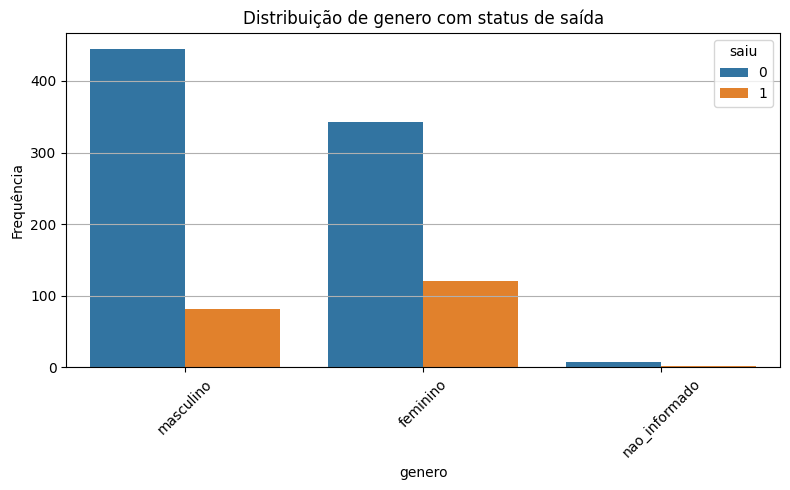

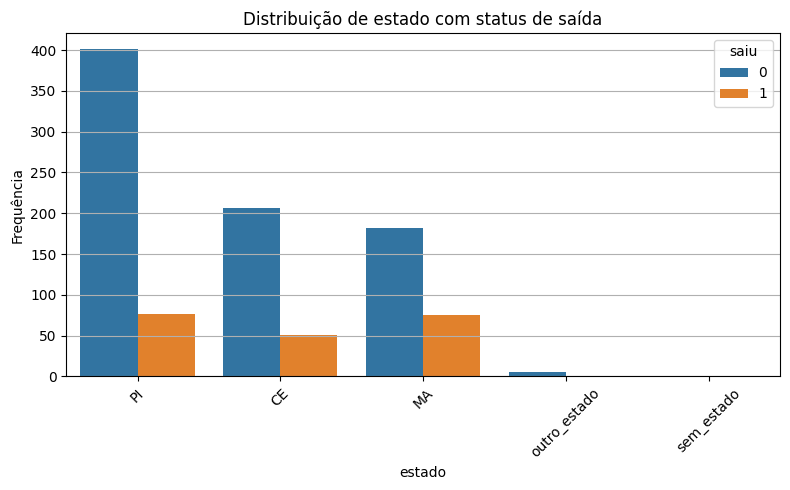

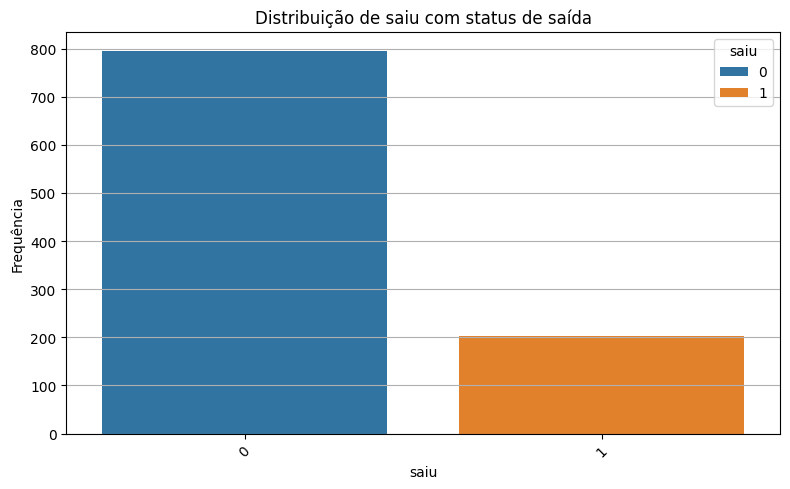

In [4]:
plot_distribuicao_categorica(df, 'genero')
plot_distribuicao_categorica(df, 'estado')
plot_distribuicao_categorica(df, 'saiu')

## 4. Análise Numérica

Analisamos a distribuição de variáveis como idade, saldo e salário, segmentando por grupos de interesse como `gênero` e `saída`.

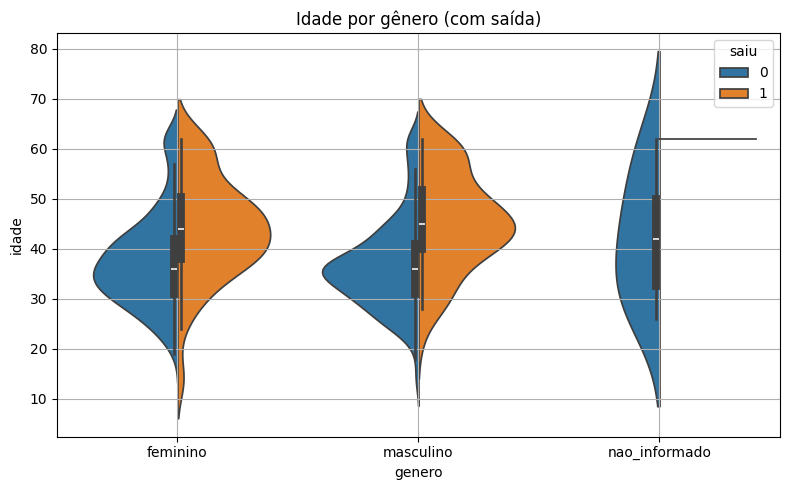

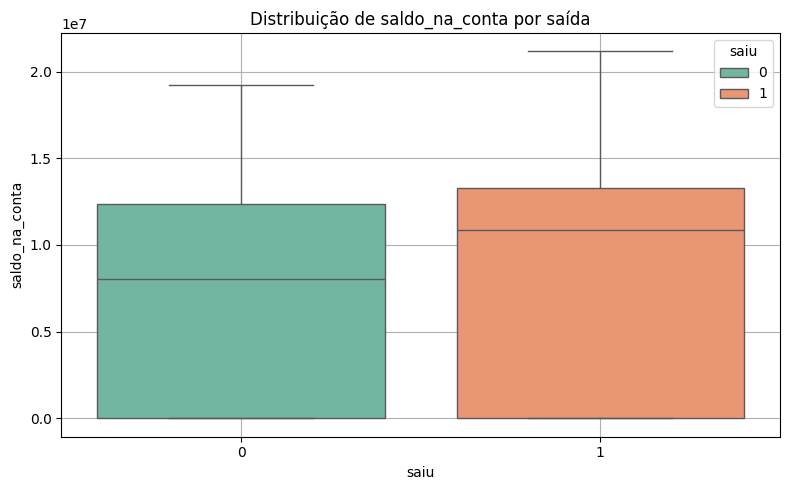

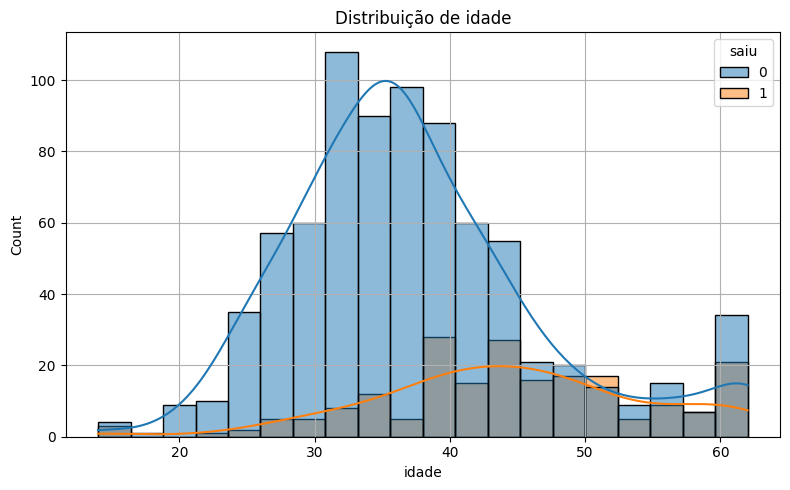

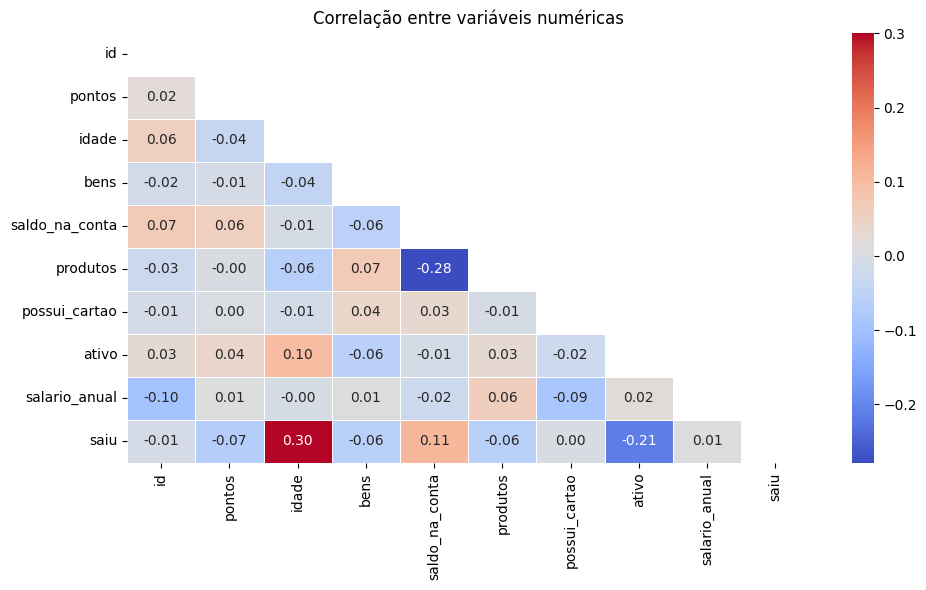

In [5]:
violinplot_idade_genero(df)
boxplot_com_saida(df, 'saldo_na_conta')
histograma_coluna(df, 'idade')
heatmap_correlacoes(df)

## 5. Estatísticas Descritivas

A seguir, apresentamos a média e a mediana do saldo na conta:
- Por faixa etária (acima e abaixo de 40 anos);
- Por status de permanência (saiu ou ficou).

In [6]:
media_mediana_por_idade(df)

,faixa_etaria,media_saldo,mediana_saldo
0,< 40,7015427.85,8229382.0
1,>= 40,7381265.97,9731825.0


In [7]:
media_mediana_por_saida(df)

,situacao,media_saldo,mediana_saldo
0,saiu,8523988.16,10843187.0
1,ficou,6814752.81,8061393.0


## 6. Perfil dos Clientes que Saíram

Com base na segmentação dos clientes que saíram (`saiu == 1`), identificamos os 3 perfis mais frequentes, considerando:
- Gênero predominante
- Estado
- Idade mediana
- Saldo médio
- Patrimônio médio

In [8]:
perfil_clientes_que_saem(df, top_n=3)

,genero,estado,idade_mediana,saldo_medio,bens_medio,quantidade
0,feminino,PI,46.0,6946288.06,4.48,50
1,feminino,MA,41.0,11639498.18,5.31,39
2,masculino,MA,44.5,11328258.64,5.25,36


## 7. Conclusão

A análise permitiu identificar padrões importantes no comportamento dos clientes, com base nos dados disponíveis. Entre os principais achados:

- **Gênero e evasão:**  
  Apesar de a base conter mais clientes do gênero masculino, o número de saídas foi proporcionalmente maior entre os clientes do gênero feminino.  
  A visualização da distribuição por gênero com `hue='saiu'` confirma esse padrão.

- **Idade e evasão:**  
  Clientes com menos de 40 anos apresentaram saldo médio mais baixo, mas a evasão foi distribuída entre todas as faixas etárias.  
  A idade mediana entre os que saíram foi em torno de 45 anos.

- **Saldo e evasão:**  
  De forma contraintuitiva, clientes que saíram tinham, em média, um saldo na conta ligeiramente maior do que os que permaneceram.  
  Isso pode indicar que fatores além do saldo impactam a decisão de saída (ex: experiência, suporte, etc.).

- **Estados com maior evasão:**  
  A maior concentração de evasão está no estado do **MA**, que apesar de ser aquele com menor quantidade entre os 3 mais representados no dataset, poussi a maior evasão.
  Outros estados foram agrupados como `outro_estado` e têm ocorrência marginal.

- **Correlação geral fraca:**  
  A matriz de correlação mostra que nenhuma variável numérica está fortemente correlacionada com a variável `saiu`.  
  O maior valor foi uma correlação positiva moderada entre `idade` e `saiu` (~0.30), o que pode justificar investigações mais profundas sobre idade e fidelização.

### 🔁 Próximos passos recomendados

- **Investigar variáveis externas**:  
  Como tempo como cliente, histórico de transações, reclamações ou uso de canais digitais — que podem explicar a evasão melhor do que variáveis financeiras isoladas.

- **Análise qualitativa ou survey**:  
  Entrevistar ex-clientes ou aplicar uma pesquisa de satisfação pode revelar motivos de saída não evidenciados nos dados estruturados.

- **Modelagem preditiva de churn**:  
  Com os dados tratados e insights obtidos, o próximo passo natural seria treinar modelos de machine learning para prever a evasão de clientes com base em perfis semelhantes.

- **Ações de retenção direcionadas**:  
  Criar campanhas específicas para os grupos de maior risco (por exemplo, mulheres com faixa etária média e saldo elevado, residentes em PI e MA).